**House Real estate data from Indian cities**

Dataset Link:
 [https://www.kaggle.com/datasets/rakkesharv/real-estate-data-from-7-indian-cities](https://)

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df=pd.read_csv("Real Estate Data V21.csv")

In [37]:
df.head()

,Name,Property Title,Price,Location,Total_Area,Price_per_SQFT,Description,Baths,Balcony
0,Casagrand ECR 14,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,7700.0,Best 4 BHK Apartment for modern-day lifestyle ...,4,Yes
1,"Ramanathan Nagar, Pozhichalur,Chennai",10 BHK Independent House for sale in Pozhichal...,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,Looking for a 10 BHK Independent House for sal...,6,Yes
2,DAC Prapthi,"3 BHK Flat for sale in West Tambaram, Chennai",₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,"Property for sale in Tambaram, Chennai. This 3...",3,No
3,"Naveenilaya,Chepauk, Triplicane,Chennai",7 BHK Independent House for sale in Triplicane...,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840.0,Entire Building for sale with 7 units of singl...,5,Yes
4,VGN Spring Field Phase 1,"2 BHK Flat for sale in Avadi, Chennai",₹48.0 L,"Avadi, Chennai",960,5000.0,"Property for sale in Avadi, Chennai. This 2 BH...",3,Yes


**Having a look on how the dataset looks like**

**Initial Data Inspection**

In [38]:
df.shape

(14528, 9)

The dataset has 14528 rows and 9 columns

In [39]:
df.columns

Index(['Name', 'Property Title', 'Price', 'Location', 'Total_Area',
       'Price_per_SQFT', 'Description', 'Baths', 'Balcony'],
      dtype='object')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14528 entries, 0 to 14527
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            14528 non-null  object 
 1   Property Title  14528 non-null  object 
 2   Price           14528 non-null  object 
 3   Location        14528 non-null  object 
 4   Total_Area      14528 non-null  int64  
 5   Price_per_SQFT  14528 non-null  float64
 6   Description     14528 non-null  object 
 7   Baths           14528 non-null  int64  
 8   Balcony         14528 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 1021.6+ KB


6 columns contains string values and 3 columns contain numeric values

In [41]:
df.describe()

,Total_Area,Price_per_SQFT,Baths
count,14528.000000,14528.000000,14528.000000
mean,1297.916988,11719.456222,2.751239
std,1245.694305,49036.068632,0.898243
min,70.000000,0.000000,1.000000
25%,650.000000,4480.000000,2.000000
50%,1000.000000,6050.000000,3.000000
75%,1439.000000,9312.500000,3.000000
max,35000.000000,999000.000000,6.000000


Provides insights into numeric columns (like Total Area, Price per SQFT,Baths)

In [42]:
df.isnull().sum()

,0
Name,0
Property Title,0
Price,0
Location,0
Total_Area,0
Price_per_SQFT,0
Description,0
Baths,0
Balcony,0


There are no missing values in the dataset

In [79]:
df['Location'].value_counts().head(10)

,count
Location,
"Sector 12 Dwarka, New Delhi",44
"Wagholi, Pune",39
"Bannerughatta, Bangalore",35
"Horamavu Agara, Horamavu,Bangalore",32
"Chakan, Pune",32
"Mattanahalli, Bangalore",31
"Veer Sandra, Electronic City,Bangalore",31
"Yelahanka, Bangalore",30
"Veer Sandra, Electronic City Phase II,Bangalore",29


Above are the top 10 locations by count

In [44]:
# Function to convert to lakhs
def convert_price_to_lakhs(price_str):
    if pd.isnull(price_str):
        return np.nan

    price_str = str(price_str).replace('₹', '').replace(',', '').strip().lower()

    if 'cr' in price_str:
        try:
            num = float(price_str.replace('cr', '').strip())
            return round(num * 100, 2)
        except:
            return np.nan
    elif 'l' in price_str:
        try:
            num = float(price_str.replace('l', '').strip())
            return round(num, 2)
        except:
            return np.nan
    else:
        return np.nan  # unknown format

# Apply to DataFrame
df['Price'] = df['Price'].apply(convert_price_to_lakhs)

df.rename(columns={'Price': 'Price (in Lakhs)'}, inplace=True)


In [45]:
df.head()

,Name,Property Title,Price (in Lakhs),Location,Total_Area,Price_per_SQFT,Description,Baths,Balcony
0,Casagrand ECR 14,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",199.0,"Kanathur Reddikuppam, Chennai",2583,7700.0,Best 4 BHK Apartment for modern-day lifestyle ...,4,Yes
1,"Ramanathan Nagar, Pozhichalur,Chennai",10 BHK Independent House for sale in Pozhichal...,225.0,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,Looking for a 10 BHK Independent House for sal...,6,Yes
2,DAC Prapthi,"3 BHK Flat for sale in West Tambaram, Chennai",100.0,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,"Property for sale in Tambaram, Chennai. This 3...",3,No
3,"Naveenilaya,Chepauk, Triplicane,Chennai",7 BHK Independent House for sale in Triplicane...,333.0,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840.0,Entire Building for sale with 7 units of singl...,5,Yes
4,VGN Spring Field Phase 1,"2 BHK Flat for sale in Avadi, Chennai",48.0,"Avadi, Chennai",960,5000.0,"Property for sale in Avadi, Chennai. This 2 BH...",3,Yes


In [47]:
df.isnull().sum()

,0
Name,0
Property Title,0
Price (in Lakhs),5
Location,0
Total_Area,0
Price_per_SQFT,0
Description,0
Baths,0
Balcony,0


In [ ]:
df.dropna(subset=['Price (in Lakhs)'], inplace=True)

In [87]:
print("Top 5 Most Expensive Properties:")
print(df[['Name', 'Location', 'Price (in Lakhs)']].sort_values(by='Price (in Lakhs)', ascending=False).head())


Top 5 Most Expensive Properties:
                                     Name                            Location  \
6053     Yashavantapura, Kolar, Bangalore    Yashavantapura, Kolar, Bangalore   
12952    Beadonpura, Karol Bagh,New Delhi    Beadonpura, Karol Bagh,New Delhi   
11154                      Balewadi, Pune                      Balewadi, Pune   
3537   Central Telecom Society, Bangalore  Central Telecom Society, Bangalore   
3227                   Skyline City Tower  Maruthi Nagar, Attiguppe,Bangalore   

       Price (in Lakhs)  
6053             8400.0  
12952            6500.0  
11154            4020.0  
3537             3500.0  
3227             3500.0  


In [88]:
print("Top 5 Cheapest Per Sqft Properties:")
print(df[['Name', 'Location', 'Price_per_SQFT']].sort_values(by='Price_per_SQFT').head())

Top 5 Cheapest Per Sqft Properties:
                                    Name                           Location  \
5913                Doddabele, Bangalore               Doddabele, Bangalore   
12786           Kashmere Gate, New Delhi           Kashmere Gate, New Delhi   
9088   Srijani Pally, Duttapukur,Kolkata  Srijani Pally, Duttapukur,Kolkata   
1524               Manimangalam, Chennai              Manimangalam, Chennai   
9163             Ghola, Agarpara,Kolkata            Ghola, Agarpara,Kolkata   

       Price_per_SQFT  
5913           1000.0  
12786          1000.0  
9088           1000.0  
1524           1000.0  
9163           1000.0  


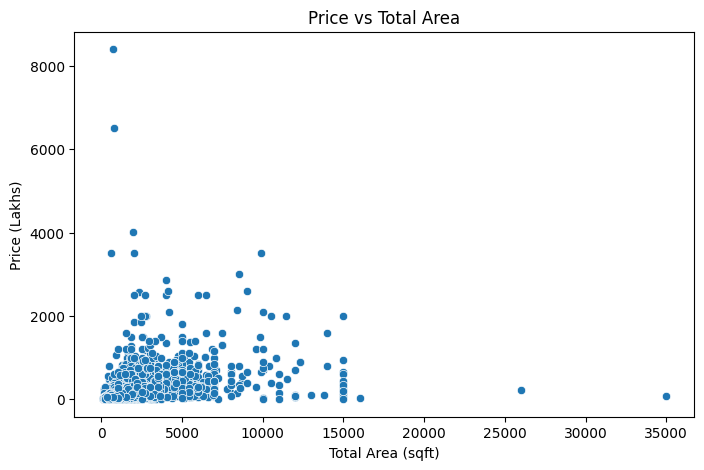

In [54]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Total_Area', y='Price (in Lakhs)', data=df)
plt.title('Price vs Total Area')
plt.xlabel('Total Area (sqft)')
plt.ylabel('Price (Lakhs)')
plt.show()

Insight: Price generally increases with Total Area, with some outliers.

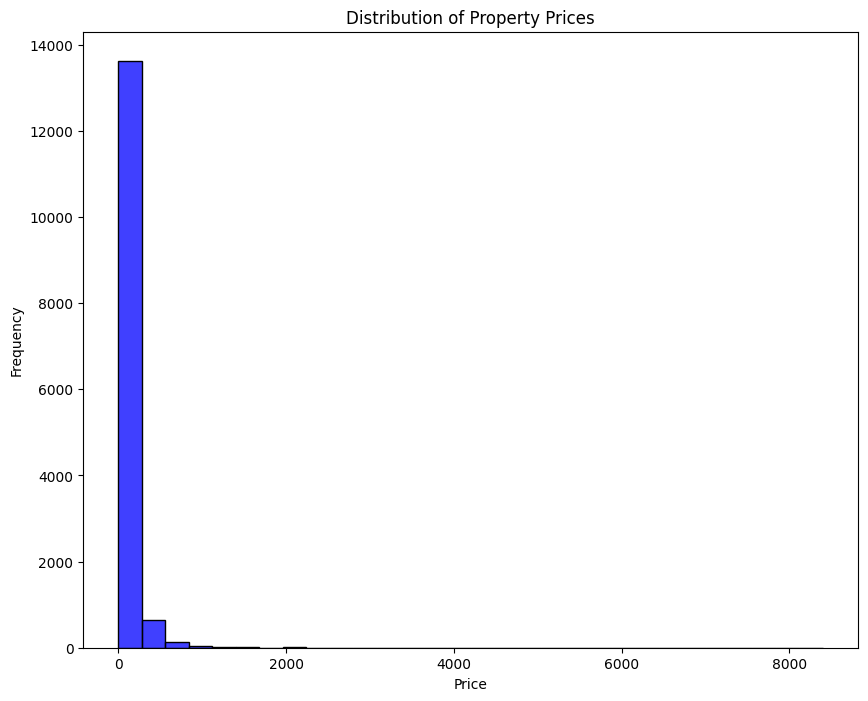

In [98]:
plt.figure(figsize=(10,8))
sns.histplot(df['Price (in Lakhs)'], color='blue',bins=30)
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Insight: The data is skewed to the right, meaning most properties have lower prices and lie in one range, and fewer properties have very high prices.

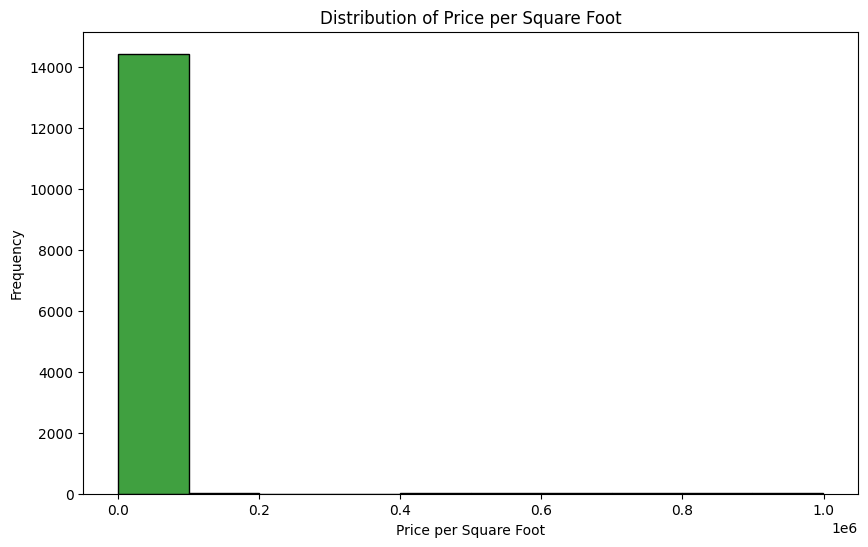

In [104]:
plt.figure(figsize=(10,6))
sns.histplot(df['Price_per_SQFT'], color='green',bins=10)
plt.title('Distribution of Price per Square Foot')
plt.xlabel('Price per Square Foot')
plt.ylabel('Frequency')
plt.show()
# Insight: Distribution of Price per SQFT is also skewed right.

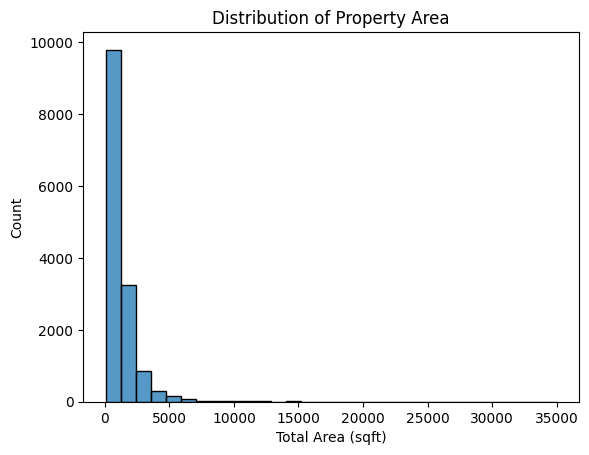

In [84]:
sns.histplot(df['Total_Area'].dropna(), bins=30)
plt.title("Distribution of Property Area")
plt.xlabel("Total Area (sqft)")
plt.ylabel("Count")
plt.show()


Insight: The distribution of Total Area is skewed to the right, with most properties having smaller areas.

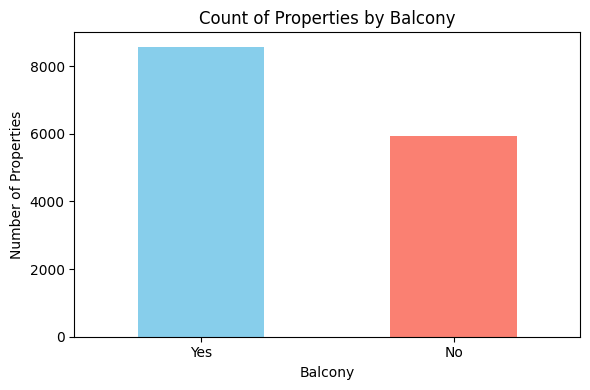

In [70]:
plt.figure(figsize=(6, 4))
df['Balcony'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Count of Properties by Balcony')
plt.xlabel('Balcony')
plt.ylabel('Number of Properties')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Insight: There are more properties with balconies than properties without balconies in the dataset.

In [80]:
df['Balcony'] = df['Balcony'].map({'Yes': 1, 'No': 0})

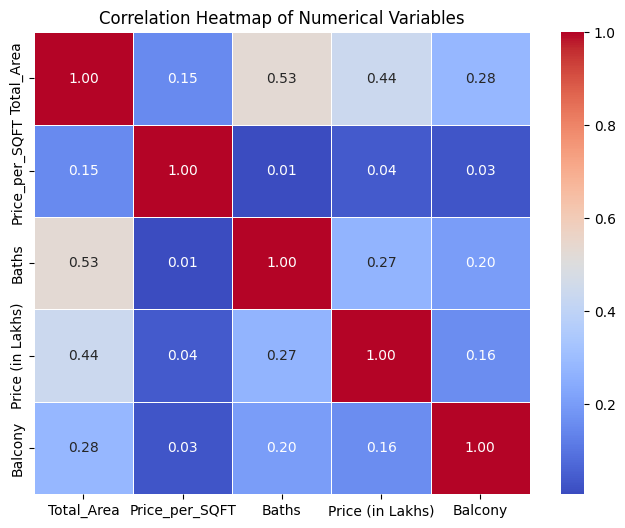

In [81]:
numerical_cols = ['Total_Area', 'Price_per_SQFT', 'Baths', 'Price (in Lakhs)', 'Balcony']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

Insight: Total Area and Baths have the strongest positive correlation, while Price per SQFT has weak correlations with other numerical variables.